In [ ]:
#### 1. TRADUZIONE (DEEPL) ####

In [3]:
!pip install pandas deepl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import deepl
from time import sleep

Mounted at /content/drive


ModuleNotFoundError: No module named 'deepl'

In [6]:
df = pd.read_csv('/content/drive/MyDrive/0 Data Portfolio/Olist/olist_order_reviews_dataset.csv')
df["review_comment_message_en"] = ""
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_message_en
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,


In [1]:
deepl_api_key = '82b3a5f5-6aa8-415b-92b5-ba1c377fbd35:fx'

SOURCE_LANG = "PT"
TARGET_LANG = "EN-US"

BATCH_SIZE = 50   # safe for free tier
SLEEP_SECONDS = 1 # avoid rate limits

In [7]:
translator = deepl.Translator(deepl_api_key)

In [8]:
mask = (
    df["review_comment_message"].notna()
    & (df["review_comment_message"].str.strip() != "")
    & (df["review_comment_message_en"].str.strip() == "")
)

texts = df.loc[mask, "review_comment_message"].tolist()
indices = df.loc[mask].index.tolist()

print(f"Found {len(texts)} reviews to translate.")

Found 40950 reviews to translate.


In [9]:
for i in range(0, len(texts), BATCH_SIZE):
    batch_texts = texts[i : i + BATCH_SIZE]
    batch_indices = indices[i : i + BATCH_SIZE]

    print(f"Translating {i + 1}–{i + len(batch_texts)}...")

    results = translator.translate_text(
        batch_texts,
        source_lang=SOURCE_LANG,
        target_lang=TARGET_LANG,
    )

Translating 1–50...
Translating 51–100...
Translating 101–150...
Translating 151–200...
Translating 201–250...
Translating 251–300...
Translating 301–350...
Translating 351–400...
Translating 401–450...
Translating 451–500...
Translating 501–550...
Translating 551–600...
Translating 601–650...
Translating 651–700...
Translating 701–750...
Translating 751–800...
Translating 801–850...
Translating 851–900...
Translating 901–950...
Translating 951–1000...
Translating 1001–1050...
Translating 1051–1100...
Translating 1101–1150...
Translating 1151–1200...
Translating 1201–1250...
Translating 1251–1300...
Translating 1301–1350...
Translating 1351–1400...
Translating 1401–1450...
Translating 1451–1500...
Translating 1501–1550...
Translating 1551–1600...
Translating 1601–1650...
Translating 1651–1700...
Translating 1701–1750...
Translating 1751–1800...
Translating 1801–1850...
Translating 1851–1900...
Translating 1901–1950...
Translating 1951–2000...
Translating 2001–2050...
Translating 2051–2

QuotaExceededException: Quota for this billing period has been exceeded, message: Quota Exceeded

In [10]:
for idx, translation in zip(batch_indices, results):
    df.at[idx, "review_comment_message_en"] = translation.text

sleep(SLEEP_SECONDS)

In [11]:
df.to_csv('reviews_en.csv', index=False)

In [12]:
from google.colab import files
files.download('reviews_en.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
rev_en = pd.read_csv('/content/drive/MyDrive/0 Data Portfolio/Olist/reviews_en.csv')

/tmp/ipython-input-1279151571.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rev_en = pd.read_csv('/content/drive/MyDrive/0 Data Portfolio/Olist/reviews_en.csv')


In [4]:
rev_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   review_id                  99224 non-null  object
 1   order_id                   99224 non-null  object
 2   review_score               99224 non-null  int64 
 3   review_comment_title       11568 non-null  object
 4   review_comment_message     40977 non-null  object
 5   review_creation_date       99224 non-null  object
 6   review_answer_timestamp    99224 non-null  object
 7   review_comment_message_en  50 non-null     object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [21]:
rev_en_short = rev_en[['review_comment_message_en']].dropna()

In [22]:
rev_en_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 17418 to 17546
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   review_comment_message_en  50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


In [23]:
rev_en_short

,review_comment_message_en
17418,My product hasn't been delivered yet.\r\nIt ma...
17421,I'll see if it arrives on time\r\nWaiting for ...
17423,I was disappointed the product is very differe...
17426,"The product has still not been delivered, the ..."
17427,Great quality product...
17428,"Fragile product, use with care.\r\n"
17431,met expectations
17435,"I made this purchase almost a month ago, and s..."
17437,Good product I recommend
17439,Let the customer know that the product is not ...


In [ ]:
#### 2. WORDCLOUD TUTTO IL TESTO ####

In [8]:
!pip install wordcloud -q

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [24]:
text = "".join(row for row in rev_en_short['review_comment_message_en'])

<function matplotlib.pyplot.show(close=None, block=None)>

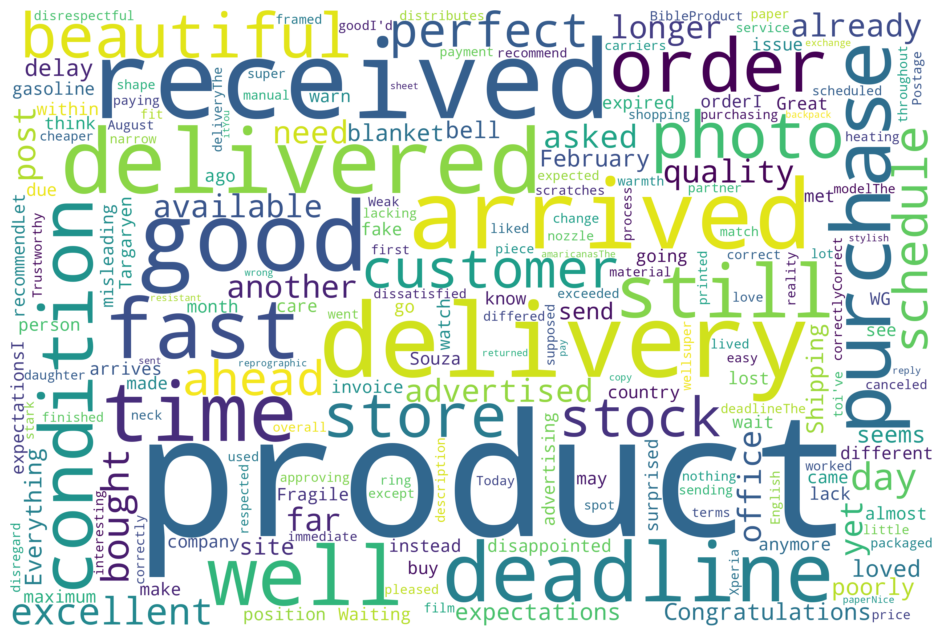

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(['bit', 'pick', '19th', 'given', 'Xa1', 'use', '21st', 'one', 'third', 'comes', 'de', '3rd'])

wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'white', stopwords=stopwords)

wordcloud.generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [11]:
wordcloud.to_file('wordcloud_generale.png')

In [13]:
# from google.colab import files
files.download('wordcloud_generale.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#### 3. SENTIMENT (SPACYTEXTBLOB) ####

In [14]:
!pip install spacytextblob -q

In [15]:
import spacy
from spacytextblob import spacytextblob

In [16]:
nlp = spacy.load('en_core_web_sm',disable=["tagger", "parser", "attribute_ruler", "lemmatizer","ner"])
nlp.add_pipe('spacytextblob')

In [17]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x77fc15fd8d10>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x77fc1617b920>)]

In [70]:
doc = nlp(text)

print('Polarity: ', doc._.blob.polarity)

Polarity:  0.2669261006289308


In [27]:
def sentiment(testo):
    """
    calcola il sentimento del testo usando TextBlob
    valori tra 1- (negativo) e 1 (positivo)
    """
    doc = nlp(testo)
    return doc._.blob.polarity

In [29]:
rev_en_short['polarity'] = rev_en_short['review_comment_message_en'].apply(sentiment)

rev_en_short

,review_comment_message_en,polarity
17418,My product hasn't been delivered yet.\r\nIt ma...,-0.125000
17421,I'll see if it arrives on time\r\nWaiting for ...,0.000000
17423,I was disappointed the product is very differe...,-0.137500
17426,"The product has still not been delivered, the ...",0.000000
17427,Great quality product...,0.800000
17428,"Fragile product, use with care.\r\n",0.000000
17431,met expectations,0.000000
17435,"I made this purchase almost a month ago, and s...",0.100000
17437,Good product I recommend,0.700000
17439,Let the customer know that the product is not ...,0.100000


In [71]:
def classificazione_sentiment(x):
    """
    classifica sentiment delle recensioni
    con treshold +-0.3
    """
    if x > 0.3:
        return 'positivo'
    elif x < -0.3:
        return 'negativo'
    else:
        return 'neutro'

In [72]:
rev_en_short['sentiment'] = rev_en_short['polarity'].apply(classificazione_sentiment)

In [73]:
rev_en_short

,review_comment_message_en,polarity,sentiment
17418,My product hasn't been delivered yet.\r\nIt ma...,-0.125000,neutro
17421,I'll see if it arrives on time\r\nWaiting for ...,0.000000,neutro
17423,I was disappointed the product is very differe...,-0.137500,neutro
17426,"The product has still not been delivered, the ...",0.000000,neutro
17427,Great quality product...,0.800000,positivo
17428,"Fragile product, use with care.\r\n",0.000000,neutro
17431,met expectations,0.000000,neutro
17435,"I made this purchase almost a month ago, and s...",0.100000,neutro
17437,Good product I recommend,0.700000,positivo
17439,Let the customer know that the product is not ...,0.100000,neutro


In [74]:
positive_text = ''.join(rev_en_short[rev_en_short['sentiment'] == 'positivo']['review_comment_message_en'].to_list())
negative_text = ''.join(rev_en_short[rev_en_short['sentiment'] == 'negativo']['review_comment_message_en'].to_list())

In [75]:
def wordcloud_funct(text,color, stopwords,title):
    wordcloud1 = WordCloud(width = 3000, height = 2000,background_color=color,stopwords=stopwords)
    wordcloud1.generate(text)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis("off")

    #wordcloud1.to_file(f'{title}.png')
    #files.download(f'{title}.png')

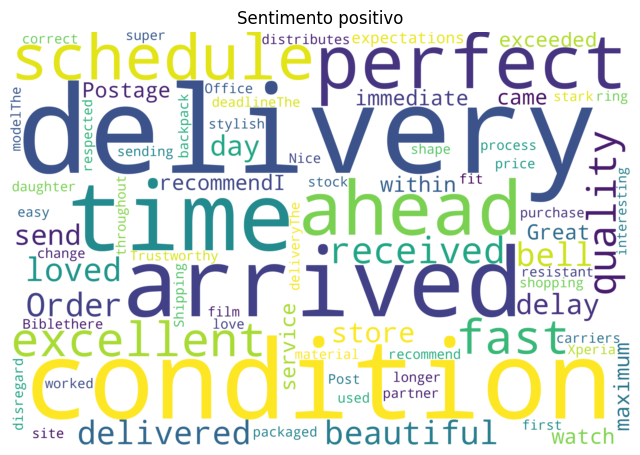

In [76]:
stopwords.update(['congratulations', 'lot', 'pleased', 'deadline', 'seems', 'well', 'good'])

pos_wordcloud = wordcloud_funct(positive_text, 'white', stopwords, 'Sentimento positivo')

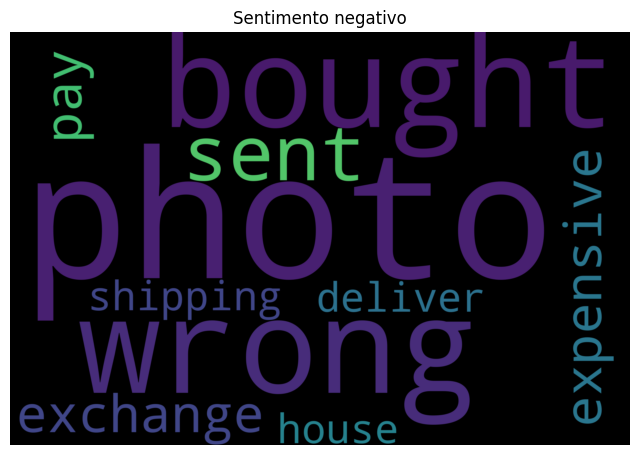

In [77]:
stopwords.update(['need', 'itYou', 'another', 'product'])

neg_wordcloud = wordcloud_funct(negative_text, 'black', stopwords, 'Sentimento negativo')

In [55]:
wordcloud.to_file('neg_wordcloud.png')
files.download('neg_wordcloud.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

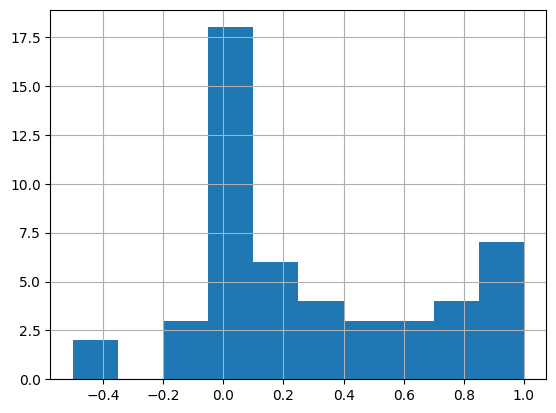

In [78]:
rev_en_short['polarity'].hist()

In [80]:
negative_text

"The photo was wrong, the product I bought was from the photo, they sent another one. I need to exchange itYou pay expensive shipping and they don't deliver to your house."